Plotting Ansombe's Quartet in 4 subgraphs.

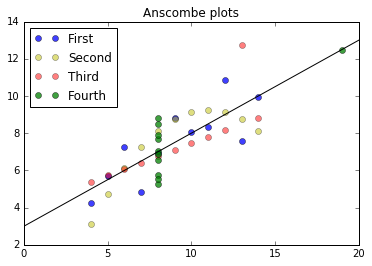

In [2]:
import numpy as np
import scipy
from scipy import misc
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('anscombe.npy')
x0 = np.linspace(0,20,200)
f = lambda x : x/2.+3
y0 = f(x0)
x1 = data[:,0]
y1 = data[:,1]
x2 = data[:,2]
y2 = data[:,3]
x3 = data[:,4]
y3 = data[:,5]
x4 = data[:,6]
y4 = data[:,7]

plt.plot(x1,y1,'ob',label="First",lw=0.5,alpha=.75)
plt.plot(x2,y2,'oy',label="Second",lw=0.5,alpha=.5)
plt.plot(x3,y3,'or',label="Third",lw=0.5,alpha=.5)
plt.plot(x4,y4,'og',label="Fourth",lw=0.5,alpha=.75)
plt.legend(loc=2)
plt.plot(x0,y0,'k')
plt.title("Anscombe plots")

The second (yellow) data looks like it's part of a prabola, while the fourth (green) is a constant x, changing y, and one crazy outlier way off at x=19.  The blue seems like a very loosely related data set, while red is rather close to the best fit line with the exception of the single outlier up near y=13.

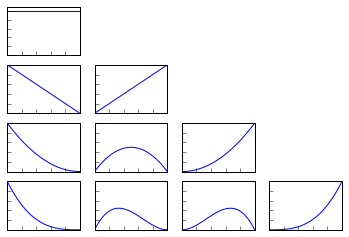

In [3]:
x = np.linspace(0,1,100)
B = []
N = [0,1,2,3]
for n in N :
    V = [i for i in xrange(n+1)]
    for v in V :
        b= lambda X : scipy.misc.comb(n,v)*(X**v)*(1-X)**(n-v)
        B.append(b(x))
        
N2 = [0,4,5,8,9,10,12,13,14,15]
for n in N2 :
        plt.subplot(4,4,n+1)
        if n == 0 :
            plt.axis([0,1,0,1.1])
        else :
            plt.axis([0,1,0,1])
        plt.plot(x,B[N2.index(n)],'b')
        plt.tick_params(which='both',top='off',right='off',labelbottom='off',labelleft='off')

Organized as described with the row corresponding to $n$, and the column $v$.  All functions (except the first) are viewed in a $[0,1]\times [0,1]$ box.  The first is $[0,1]\times [0,1.1]$.

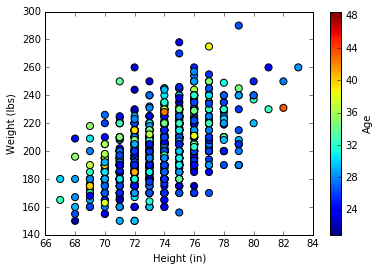

In [6]:
data = np.load('MLB.npy')
height = data[:,0]
weight = data[:,1]
age = data[:,2]
plt.scatter(height,weight,c=age,s=50)
cbar = plt.colorbar()
cbar.set_label("Age")
plt.xlabel("Height (in)")
plt.ylabel("Weight (lbs)")

It seems like height and weight are directly correlated, but age is related to neither.  They are a lot younger than I thought, though.

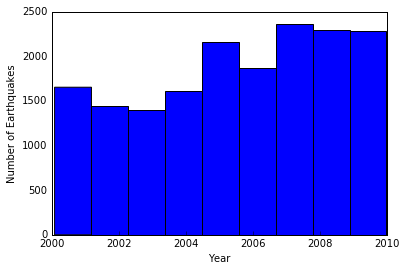

In [24]:
year, magnitude, latitude, longitude = np.load("earthquakes.npy").T
plt.hist(year,bins=9)
plt.tick_params(left='off',top='off',right='off')
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")

The histogram shows us roughly how many earthquakes happen per year.

(-200.0, 200.0, -80.0, 100.0)

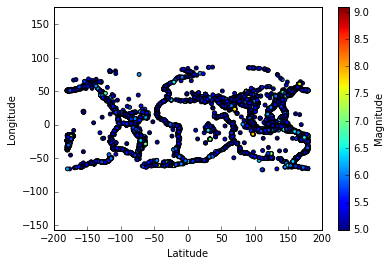

In [25]:
plt.scatter(latitude,longitude,c=magnitude,s=15)
cbar = plt.colorbar()
cbar.set_label("Magnitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.tick_params(top='off',right='off')
plt.axis('equal')

This scatterplot answers the questions of how frequently major earthquakes happen versus minor (frankly, not a lot...most of these are somewhere between 5.0 and 6.0), and also where they occur.  There's a big concentration on the far right, coresponding to eastern Asia and the western part of the pacific ocean (or part of the ring of fire) with the next largest concentration happening on the far left, near the San Andreas Fault (the other side of the ring of fire).

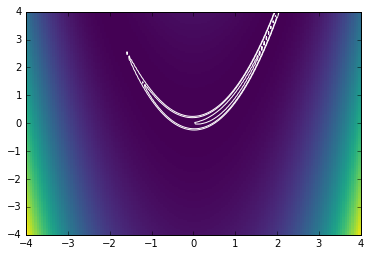

In [40]:
x = np.linspace(-4,4,150)
X,Y = np.meshgrid(x,x.copy())
Z = (1-X)**2+100*(Y-X**2)**2

plt.pcolormesh(X,Y,Z,cmap='viridis')
plt.contour(X,Y,Z,[0,1,5,7],colors='white')

The cell below loads the data necessary for the following 4 plots.

In [47]:
data = np.load('countries.npy')
countries = ["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"]
pop = data[:,0]
gdp = data[:,1]
m_height = data[:,2]
f_height = data[:,3]

A bar chart ordering the populations of the given countires:

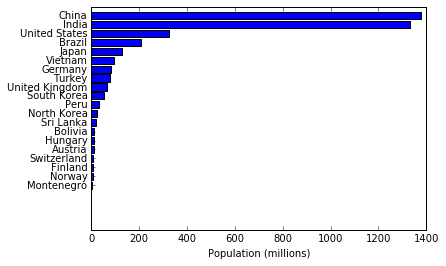

In [71]:
#np.argsort(pop) is 100% failing to return things properly sorted, so I do it manually.
s_pop = [4,6,16,19,2,13,5,18,15,8,0,1,9,10,7,3,12,11,17,14]
ord_countries = []
ord_pop = []
for i in xrange(len(s_pop)) :
    z = s_pop.index(min(s_pop))
    #print s_pop,z
    ord_countries.append(countries[z])
    ord_pop.append(pop[z])
    s_pop[z] = len(s_pop)

x = np.arange(len(ord_countries))
plt.barh(x,ord_pop,align='center')
plt.yticks(x,ord_countries)
plt.tick_params(right='off')
plt.xlabel('Population (millions)')

A scatter plot comparing average male height and average female height:

[150, 190, 150, 190]

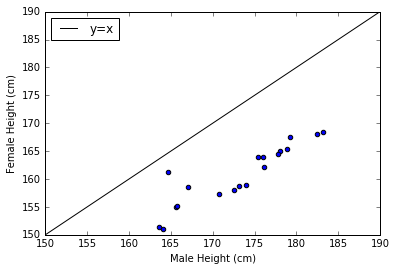

In [81]:
plt.scatter(m_height,f_height)
plt.xlabel("Male Height (cm)")
plt.ylabel("Female Height (cm)")
x = np.linspace(150,190,200)
y = np.linspace(150,190,200)
plt.plot(x,y,'k',label="y=x")
plt.legend(loc='upper left')
plt.axis([150,190,150,190])

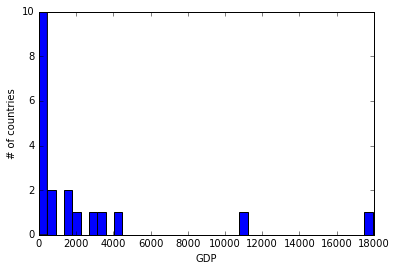

In [87]:
plt.hist(gdp,bins=40)
plt.xlabel("GDP")
plt.ylabel("# of countries")

The histogram above shows that the GDP of half of the present countries is less than 500, while there are two countries with enormous GDPs compared to everyone else.